In [1]:
%load_ext watermark
%watermark

2019-04-07T04:57:09-05:00

CPython 3.7.3rc1
IPython 7.3.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
CPU cores  : 4
interpreter: 64bit


In [2]:
from IPython.display import Image
import pandas as pd
import numpy as np

In [3]:
datos = pd.read_csv("D:/datasets/Curso_Mauel_Garrido/datos_procesamiento.csv")

In [4]:
datos.head()

,col_inexistente1,col2,col3,col_outliers,col_outliers2,col_categorica,col_ordinal,col_texto,objetivo
0,59.0,52.0,2.232832,-50,0.771666,ratón,muy bien,Tenía en su casa una ama que pasaba de los cua...,1
1,31.0,74.0,0.906147,-5,1.068558,elefante,regular,"El resto della concluían sayo de velarte, calz...",0
2,81.0,28.0,0.626750,-32,0.846396,ratón,muy mal,"El resto della concluían sayo de velarte, calz...",0
3,34.0,16.0,0.816738,-84,0.637381,gato,mal,"Una olla de algo más vaca que carnero, salpicó...",0
4,32.0,28.0,0.571131,65,4.540614,gato,bien,Tenía en su casa una ama que pasaba de los cua...,0


In [5]:
from sklearn import preprocessing, feature_extraction

Como vimos en un apartado anterior, en este ejemplo vamos a modificar cada variable en función de su tipo. Al conjunto de pasos que siguen los datos se le llama comúnmente **Pipelines** (literalmente, sistemas de tuberias).

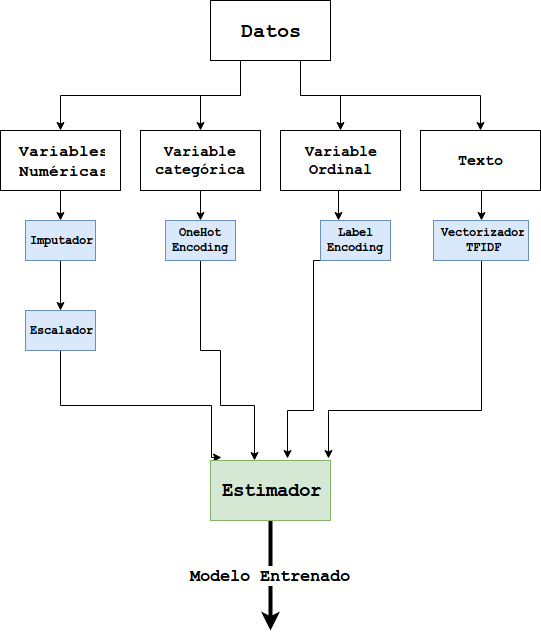

In [6]:
Image("D:/datasets/Curso_Mauel_Garrido/media/pipeline.png")

**INCISO**

vamos a modificar dos transformadores de scikitlearn para que sean compatibles con pipelines. Este paso es necesario en la version actual de scikit-learn, pero seguramente será arreglado en el futuro

In [7]:
class BinarizadorCategorico(preprocessing.LabelBinarizer):
    def fit(self, X, y=None):
        super(BinarizadorCategorico, self).fit(X)
        
    def transform(self, X, y=None):
        return super(BinarizadorCategorico, self).transform(X)

    def fit_transform(self, X, y=None):
        return super(BinarizadorCategorico, self).fit(X).transform(X)
    
    
class CodificadorCategorico(preprocessing.LabelEncoder):
    def fit(self, X, y=None):
        super(CodificadorCategorico, self).fit(X)
        
    def transform(self, X, y=None):
        return super(CodificadorCategorico, self).transform(X)

    def fit_transform(self, X, y=None):
        return super(CodificadorCategorico, self).fit(X).transform(X)    

En primer lugar vamos a definir los transformadores de forma similar a como hicimos la última vez, solo que en vez de usar `OneHotEncoder` vamos a usar nuestra version de sklearn `LabelBinarizer` que hace la codificación one hot directamente sobre una variable categórica.

In [8]:
from sklearn.linear_model import LogisticRegression

col_numericas =  ['col_inexistente1', 'col2', 'col3', 'col_outliers', 'col_outliers2']
col_categorica = ['col_categorica']
col_texto = ['col_texto']
col_ordinal = ['col_ordinal']

imputador = preprocessing.Imputer()
escalador = preprocessing.StandardScaler()

transformador_ordinal = CodificadorCategorico()
transformador_categorico = BinarizadorCategorico()

transformador_texto = feature_extraction.text.TfidfVectorizer()

estimador = LogisticRegression()

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Vemos que con el Binarizador transformamos como:

In [9]:
datos[col_categorica]

,col_categorica
0,ratón
1,elefante
2,ratón
3,gato
4,gato
5,perro
6,perro
7,perro
8,elefante
9,elefante


In [10]:
transformador_categorico.fit_transform(datos[col_categorica])

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

Que es mucho más sencillo que cómo lo hicimos la vez anterior:

In [11]:
preprocessing.OneHotEncoder().fit_transform(
    transformador_ordinal.fit_transform(datos[col_categorica]).reshape(1000,1)
).toarray()

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can spec

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.pipeline import Pipeline

Un pipeline de sklearn se define como una secuencia de pasos. Cada paso se define con una tupla de forma `[nombre del paso, transformador]`

Por ejemplo, si queremos crear un pipeline que procese las variables numéricas, primero imputándolas y después estandarizandolas, podriamos crear un pipeline como:

In [14]:
transformador_numerico = Pipeline(
     [('imputador', imputador), ('escalador', escalador)]
)

In [15]:
transformador_numerico

Pipeline(memory=None,
     steps=[('imputador', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('escalador', StandardScaler(copy=True, with_mean=True, with_std=True))])

Ahora tenemos definidos los pasos que queremos aplicar a cada variable.

In [16]:
transformador_numerico.fit_transform(datos[col_numericas])

array([[ 0.39921733,  0.08280686,  0.44281884, -0.69460006, -0.03836537],
       [-0.65360504,  0.86133291, -0.32339035, -0.11846597, -0.03827803],
       [ 1.22643491, -0.76649428, -0.4847522 , -0.46414642, -0.03834338],
       ...,
       [-1.10481463,  0.11819441, -0.42094381,  0.88016644, -0.03819664],
       [ 1.48964051,  1.56908386, -0.4077454 ,  0.81615154, -0.03818958],
       [ 1.7152453 ,  0.22435705, -0.13638793,  0.72653069, -0.03831468]])

Pero seguimos teniendo el mismo problema de siempre, como podemos aplicar determinados transformadores a determinadas variables?

Bien, para los casos en los que tenemos un dataframe de Pandas, una opcion es crear un transformador customizado que simplemente selecciones columnas de un dataframe.

En `scikit-learn` podemos crear nuestros propios transformadores creando una clase que herede de `TransformerMixin` y que tenga el mètodo `transform`.

In [17]:
from sklearn.base import TransformerMixin

class TransformadorBase(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X

Vamos a crear dos transformadores, un `DenseTransformer` que convierte una matriz `sparse` en un array (tomado de [mlxtend](http://rasbt.github.io/mlxtend/), y `ColumnExtractor` que devuelve una selección de columnas. 

In [18]:
from sklearn.base import BaseEstimator

from scipy.sparse import issparse


# http://rasbt.github.io/mlxtend/
class DenseTransformer(BaseEstimator):
    def __init__(self, return_copy=True):
        self.return_copy = return_copy
        self.is_fitted = False

    def transform(self, X, y=None):
        if issparse(X):
            return X.toarray()
        elif self.return_copy:
            return X.copy()
        else:
            return X

    def fit(self, X, y=None):
        self.is_fitted = True
        return self

    def fit_transform(self, X, y=None):
        return self.transform(X=X, y=y)

class ColumnExtractor(TransformerMixin):

    def __init__(self, columns):
        self.columns = columns
        
    def transform(self, X, **transform_params):
        return X[self.columns].as_matrix()
        
    def fit(self, X, y=None, **fit_params):
        return self

Por ejemplo si creamos un ColumnExtractor pasandole las columnas numéricas tenemos un transformador que podemos usar en un pipeline y que simplemente selecciona un subgrupo de columnas (devolviendolas como matriz)

In [19]:
cext = ColumnExtractor(columns=col_numericas)

In [20]:
cext.fit_transform(datos)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


array([[ 59.        ,  52.        ,   2.23283208, -50.        ,
          0.77166646],
       [ 31.        ,  74.        ,   0.90614714,  -5.        ,
          1.06855838],
       [ 81.        ,  28.        ,   0.62675042, -32.        ,
          0.84639576],
       ...,
       [ 19.        ,  53.        ,   0.73723413,  73.        ,
          1.34525201],
       [ 88.        ,  94.        ,   0.76008706,  68.        ,
          1.3692463 ],
       [ 94.        ,  56.        ,   1.2299403 ,  61.        ,
          0.94395714]])

Creamos ahora los pipelines para cada tipo de variable. En algunos casos he añadido pasos adicionales por dos motivos. El primero, que determinados elementos de sklearn esperan datos ligeramente distintos. En segundo lugar, para conseguir que la salida de cada pipeline tenga la misma forma (un array de arrays).

In [21]:
pipeline_numerico = Pipeline([
    ['selector_numerico', ColumnExtractor(columns=col_numericas)],
    ['transformador_numerico', transformador_numerico]
])

pipeline_numerico.fit_transform(datos)[:5]

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


array([[ 0.39921733,  0.08280686,  0.44281884, -0.69460006, -0.03836537],
       [-0.65360504,  0.86133291, -0.32339035, -0.11846597, -0.03827803],
       [ 1.22643491, -0.76649428, -0.4847522 , -0.46414642, -0.03834338],
       [-0.54080264, -1.19114485, -0.37502756, -1.12990136, -0.03840487],
       [-0.61600424, -0.76649428, -0.51687443,  0.77774261, -0.03725668]])

In [22]:
pipeline_texto = Pipeline([
        ['selector_texto', ColumnExtractor(columns=col_texto)],
        ['transformador_dim', preprocessing.FunctionTransformer(lambda x: x[:,0], validate=False)],
        ['transformador_texto', transformador_texto],
        ['texto_array', DenseTransformer()]
    ])

pipeline_texto.fit_transform(datos)[:5]

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.20474512, 0.        , 0.        , 0.        , 0.20474512,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.20474512, 0.        , 0.        , 0.20474512,
        0.        , 0.        , 0.        , 0.20474512, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.20474512, 0.        , 0.        , 0.14641557, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.12243162,
        0.12073233, 0.        , 0.20474512, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.10065821, 0.        , 0.        , 0.        , 0.        ,
        0.20474512, 0.        , 0.14641557, 0.  

In [23]:
pipeline_categorico = Pipeline([
    ['selector_categorica', ColumnExtractor(columns=col_categorica)],
    ['transformador_categorico', transformador_categorico]
])

pipeline_categorico.fit_transform(datos)[:5]

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0]])

En el caso del pipeline ordinal hay que manipular las dimensiones de los arrays dado que trabaja con un vector de dimension 1.

In [24]:
pipeline_ordinal = Pipeline([
    ['selector_ordinal', ColumnExtractor(columns=col_ordinal)],
    ['transformador_dim1', preprocessing.FunctionTransformer(lambda x: x[:,0], validate=False)],
    ['transformador_ordinal', transformador_ordinal],
    ['transformador_dim2', preprocessing.FunctionTransformer(lambda x: np.vstack(x[:]), validate=False)],
])


pipeline_ordinal.fit_transform(datos)[:5]

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


array([[2],
       [4],
       [3],
       [1],
       [0]])

Ya tenemos una manera de, dado un conjunto de datos, separarlos y aplicar distintas transformaciones a cada variable. Nos falta una manera de, una vez se han transformado, reunirlas de nuevo.

Para ello podemos usar `FeatureUnion`, que simplemente toma un conjunto de pasos de un pipeline y los une.

In [25]:
from sklearn.pipeline import FeatureUnion

In [26]:
pipeline_procesado = FeatureUnion([
    ('variables_numericas', pipeline_numerico),
    ('variables_ordinales', pipeline_ordinal),
    ('variables_texto', pipeline_texto),
    ('variables_categoricas', pipeline_categorico),
])

In [27]:
pipeline_procesado

FeatureUnion(n_jobs=None,
       transformer_list=[('variables_numericas', Pipeline(memory=None,
     steps=[('selector_numerico', <__main__.ColumnExtractor object at 0x00000229F5687DA0>), ['transformador_numerico', Pipeline(memory=None,
     steps=[('imputador', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', ver...transformador_categorico', BinarizadorCategorico(neg_label=0, pos_label=1, sparse_output=False)]]))],
       transformer_weights=None)

In [28]:
pipeline_procesado.fit_transform(datos)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


array([[ 0.39921733,  0.08280686,  0.44281884, ...,  0.        ,
         0.        ,  1.        ],
       [-0.65360504,  0.86133291, -0.32339035, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.22643491, -0.76649428, -0.4847522 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.10481463,  0.11819441, -0.42094381, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.48964051,  1.56908386, -0.4077454 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.7152453 ,  0.22435705, -0.13638793, ...,  0.        ,
         0.        ,  0.        ]])

Finalmente, necesitamos añadir un estimador al final para predecir en base a los datos transformados

In [29]:
pipeline_estimador = Pipeline([
    ('procesador', pipeline_procesado),
    ('estimador', estimador)
])

In [30]:
pipeline_estimador.fit(datos, datos.objetivo)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('procesador', FeatureUnion(n_jobs=None,
       transformer_list=[('variables_numericas', Pipeline(memory=None,
     steps=[('selector_numerico', <__main__.ColumnExtractor object at 0x00000229F5687DA0>), ['transformador_numerico', Pipeline(memory=None,
     steps=[('imputador', Imputer(axis=0...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [31]:
pipeline_estimador.predict(datos)[:5]

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


array([0, 1, 0, 1, 1], dtype=int64)

El beneficio de los pipelines, no solo es tener codigo mas legible y poder gestionar de forma ordenada todo el ciclo de vida del modelado, sino que los pipelines tienen todos los beneficios de los objetos de scikitlearn, por ejemplo, podemos usar validacion cruzada directamente con el pipeline.

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
cross_val_score(pipeline_estimador, X=datos.drop('objetivo', axis=1), y=datos.objetivo, scoring='roc_auc', cv=5)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-pa

array([0.53326733, 0.48934893, 0.52035204, 0.49464946, 0.47535354])

La forma de usar `Pipeline` junto con `FeatureUnion` es la forma mas comun de usar pipelines. Sin embargo, existe una forma mas simplificada en la que no le asignamos nombres a los elementos.

In [34]:
from sklearn.pipeline import make_pipeline, make_union

In [35]:
pipeline_simple = make_pipeline(
    make_union(
       pipeline_numerico,
       pipeline_ordinal,
       pipeline_texto,
       pipeline_categorico,
    ),
    estimador
)

In [36]:
pipeline_simple

Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=None,
       transformer_list=[('pipeline-1', Pipeline(memory=None,
     steps=[('selector_numerico', <__main__.ColumnExtractor object at 0x00000229F5687DA0>), ['transformador_numerico', Pipeline(memory=None,
     steps=[('imputador', Imputer(axis=0, copy=...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [37]:
cross_val_score(pipeline_simple, X=datos.drop('objetivo', axis=1), y=datos.objetivo, scoring='roc_auc', cv=5)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-pa

array([0.53326733, 0.48934893, 0.52035204, 0.49464946, 0.47535354])

Para aquellos casos en los que los datos que tengamos nos permitan trabajar con DataFrames de pandas (datasets tabulares) podemos usar [sklearn-pandas](https://github.com/pandas-dev/sklearn-pandas) que hace el uso de pipelines de scikit-learn bastante mas sencillo.

In [38]:
!pip install sklearn-pandas

In [39]:
from sklearn_pandas import DataFrameMapper, cross_val_score as sklearn_pandas_cross_val_score

In [40]:
datos.head()

,col_inexistente1,col2,col3,col_outliers,col_outliers2,col_categorica,col_ordinal,col_texto,objetivo
0,59.0,52.0,2.232832,-50,0.771666,ratón,muy bien,Tenía en su casa una ama que pasaba de los cua...,1
1,31.0,74.0,0.906147,-5,1.068558,elefante,regular,"El resto della concluían sayo de velarte, calz...",0
2,81.0,28.0,0.626750,-32,0.846396,ratón,muy mal,"El resto della concluían sayo de velarte, calz...",0
3,34.0,16.0,0.816738,-84,0.637381,gato,mal,"Una olla de algo más vaca que carnero, salpicó...",0
4,32.0,28.0,0.571131,65,4.540614,gato,bien,Tenía en su casa una ama que pasaba de los cua...,0


In [41]:
mapeador = DataFrameMapper([
     (['col_inexistente1'], transformador_numerico),
     (['col2'], transformador_numerico),
     (["col3"], transformador_numerico),
    (["col_outliers"], transformador_numerico),
    (["col_outliers2"], transformador_numerico),
    ("col_categorica", transformador_categorico),
    ("col_ordinal", transformador_ordinal),
    ("col_texto", transformador_texto)
 ])

In [42]:
mapeador.fit_transform(datos.copy())

array([[ 0.39921733,  0.08280686,  0.44281884, ...,  0.        ,
         0.        ,  0.        ],
       [-0.65360504,  0.86133291, -0.32339035, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.22643491, -0.76649428, -0.4847522 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.10481463,  0.11819441, -0.42094381, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.48964051,  1.56908386, -0.4077454 , ...,  0.        ,
         0.        ,  0.19788701],
       [ 1.7152453 ,  0.22435705, -0.13638793, ...,  0.        ,
         0.        ,  0.        ]])

In [43]:
mapeador.features

[(['col_inexistente1'], Pipeline(memory=None,
       steps=[('imputador', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('escalador', StandardScaler(copy=True, with_mean=True, with_std=True))])),
 (['col2'], Pipeline(memory=None,
       steps=[('imputador', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('escalador', StandardScaler(copy=True, with_mean=True, with_std=True))])),
 (['col3'], Pipeline(memory=None,
       steps=[('imputador', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('escalador', StandardScaler(copy=True, with_mean=True, with_std=True))])),
 (['col_outliers'], Pipeline(memory=None,
       steps=[('imputador', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('escalador', StandardScaler(copy=True, with_mean=True, with_std=True))])),
 (['col_outliers2'], Pipeline(memory=None,
       steps=[('imputador', Imputer(axis=0, copy=True, missing_values

In [44]:
mapeador.transformed_names_

['col_inexistente1',
 'col2',
 'col3',
 'col_outliers',
 'col_outliers2',
 'col_categorica_elefante',
 'col_categorica_gato',
 'col_categorica_perro',
 'col_categorica_ratón',
 'col_ordinal',
 'col_texto_acordarme',
 'col_texto_adarga',
 'col_texto_algo',
 'col_texto_alguna',
 'col_texto_algún',
 'col_texto_ama',
 'col_texto_amigo',
 'col_texto_antigua',
 'col_texto_astillero',
 'col_texto_así',
 'col_texto_aunque',
 'col_texto_autores',
 'col_texto_añadidura',
 'col_texto_años',
 'col_texto_basta',
 'col_texto_calzas',
 'col_texto_campo',
 'col_texto_carnero',
 'col_texto_carnes',
 'col_texto_casa',
 'col_texto_caso',
 'col_texto_caza',
 'col_texto_cincuenta',
 'col_texto_como',
 'col_texto_complexión',
 'col_texto_con',
 'col_texto_concluían',
 'col_texto_conjeturas',
 'col_texto_consumían',
 'col_texto_corredor',
 'col_texto_cuarenta',
 'col_texto_cuento',
 'col_texto_cuyo',
 'col_texto_de',
 'col_texto_decir',
 'col_texto_deja',
 'col_texto_della',
 'col_texto_deste',
 'col_texto_d

In [45]:
pipeline_estimador_pandas_sklearn = Pipeline([
    ('procesador', mapeador),
    ('estimador', estimador)
])

In [46]:
sklearn_pandas_cross_val_score(pipeline_estimador_pandas_sklearn, X=datos.drop('objetivo', axis=1).copy(),
                               y=datos.objetivo, scoring='roc_auc', cv=5)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\jorge\appdata\local\progr

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.53326733, 0.48934893, 0.52035204, 0.49464946, 0.47535354])